## Data Source

Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE: https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Import Data from COVID-19 time series

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 

In [2]:
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

COVID-19 Daily Reports

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [3]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-16-2020.csv')

In [4]:
latest_data.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2774.000000,2982.000000,2982.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,31274.175919,36.653580,-80.998891,707.874712,47.287405,178.266031,482.321276
std,17268.589814,9.926478,40.254442,7132.717652,726.392449,2862.257922,4692.124431
min,66.000000,-51.796300,-164.035380,0.000000,0.000000,0.000000,-54703.000000
25%,18103.500000,33.780007,-95.769967,4.000000,0.000000,0.000000,4.000000
50%,29142.000000,37.843679,-87.469020,16.000000,0.000000,0.000000,15.000000
75%,46086.500000,41.517404,-81.090960,79.000000,3.000000,0.000000,69.000000
max,99999.000000,71.706900,178.065000,184948.000000,22170.000000,77000.000000,111669.000000


In [5]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-16 23:30:51,34.223334,-82.461707,10,0,0,10,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-16 23:30:51,30.295065,-92.414197,108,6,0,102,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-16 23:30:51,37.767072,-75.632346,19,0,0,19,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-16 23:30:51,43.452658,-116.241552,567,9,0,558,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-16 23:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


## Get all the dates for the pandemic data

In [6]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [7]:
# Printing the dates ONLY
cols[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

## Get the COVID-19 confirmed-deaths-recoveries data

In [8]:
confirmed  = confirmed_df.loc[:, cols[4]:]
deaths     = deaths_df.loc[:, cols[4]:]
recoveries = recoveries_df.loc[:, cols[4]:]

In [9]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,0,0,0,0,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,0,0,0,0,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,0,0,0,0,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,0,0,0,0,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [10]:
# RECALL
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [11]:
dates = confirmed.keys()
world_cases     = [confirmed[i].sum() for i in dates]
total_deaths    = [deaths[i].sum() for i in dates] 
total_recovered = [recoveries[i].sum() for i in dates] 

In [12]:
total_active    = (np.array(world_cases)-np.array(total_deaths)-np.array(total_recovered)).tolist()

In [13]:
mortality_rate  = (np.array(total_deaths)/np.array(world_cases)).tolist()
recovery_rate   = (np.array(total_recovered)/np.array(world_cases)).tolist()

## Convert time string to actual datetime objects

In [14]:
import datetime

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
dates_dt = [(start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y') for i in range(len(dates))]

## Plot Coronavirus Over Time

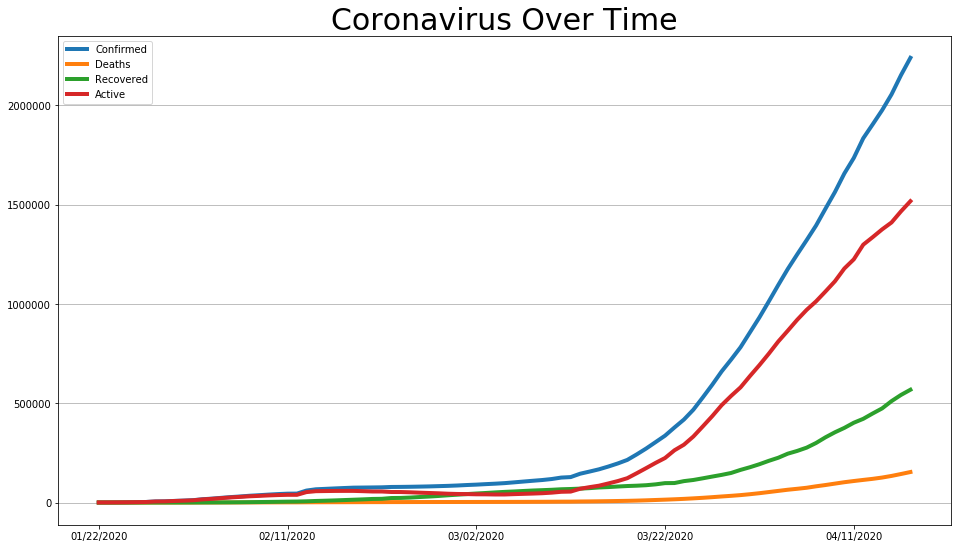

In [15]:
covid_df = pd.DataFrame(
    {'Confirmed': world_cases,
     'Deaths'   : total_deaths,
     'Recovered': total_recovered,
     'Active'   : total_active
    }, index=dates_dt)
covid_df.plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Coronavirus Over Time', size=30);

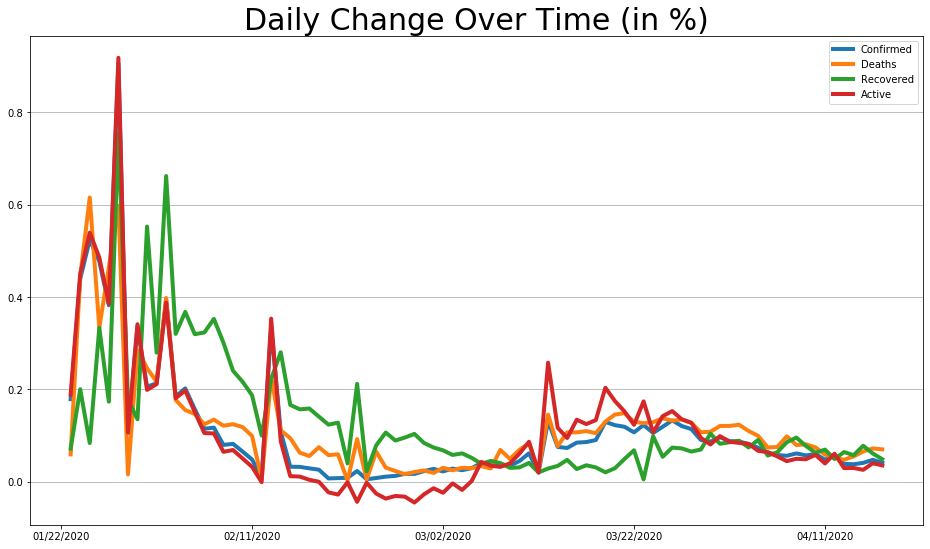

In [16]:
covid_df.pct_change().plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Daily Change Over Time (in %)', size=30);

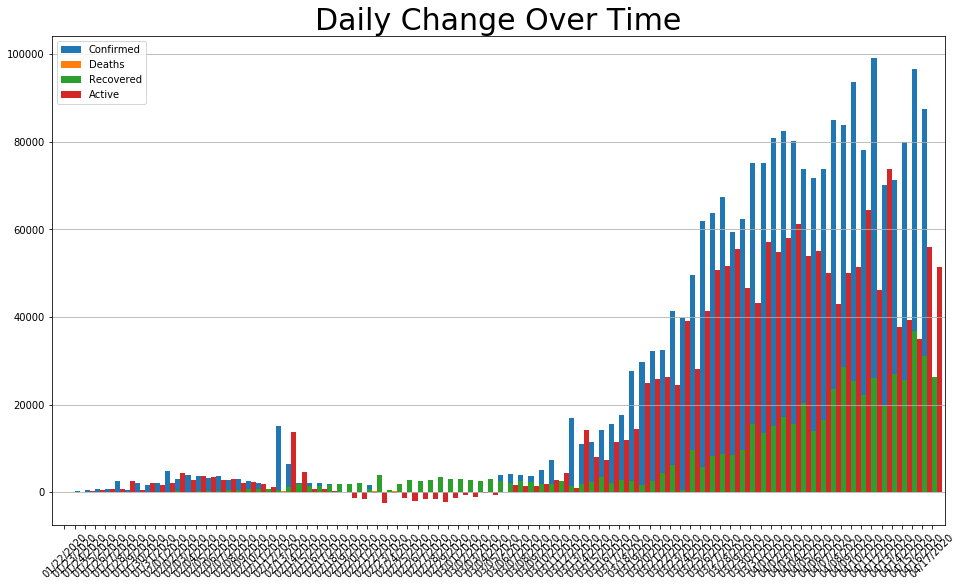

In [17]:
daily_change = covid_df.diff()
daily_change.plot.bar(figsize=(16, 9), linewidth=4, width=2).grid(axis='y')
plt.title('Daily Change Over Time', size=30)
plt.xticks(rotation=45);

In [18]:
daily_change.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

Text(0.5, 1.0, 'Global Confirmed COVID-19 Cases Daily Change Over Time')

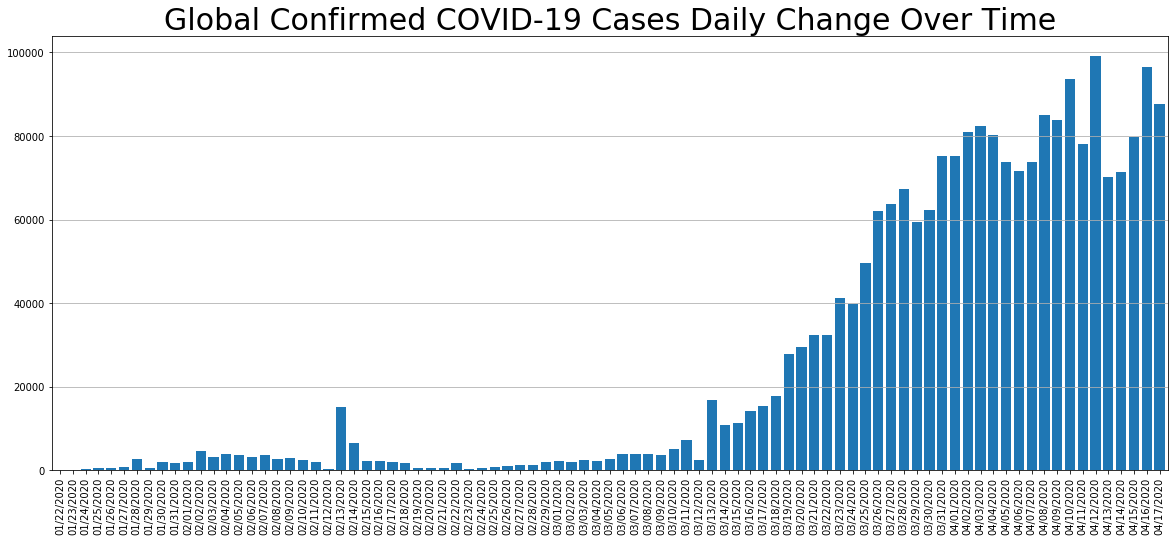

In [19]:
daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8).grid(axis='y')
plt.title('Global Confirmed COVID-19 Cases Daily Change Over Time', size=30)
#plt.xticks(rotation=45);

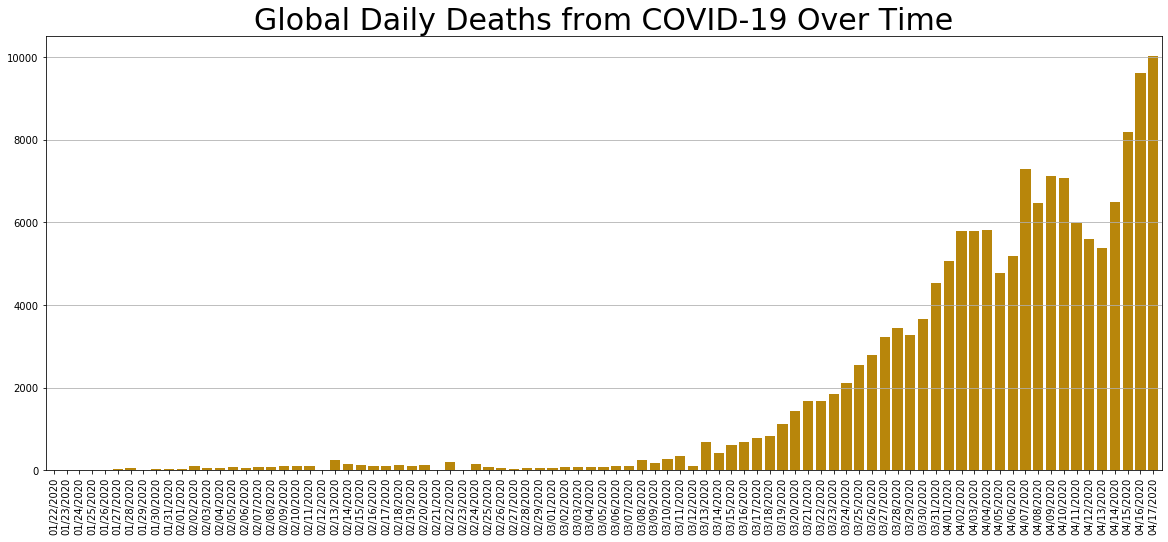

In [20]:
daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod').grid(axis='y')
plt.title('Global Daily Deaths from COVID-19 Over Time', size=30);

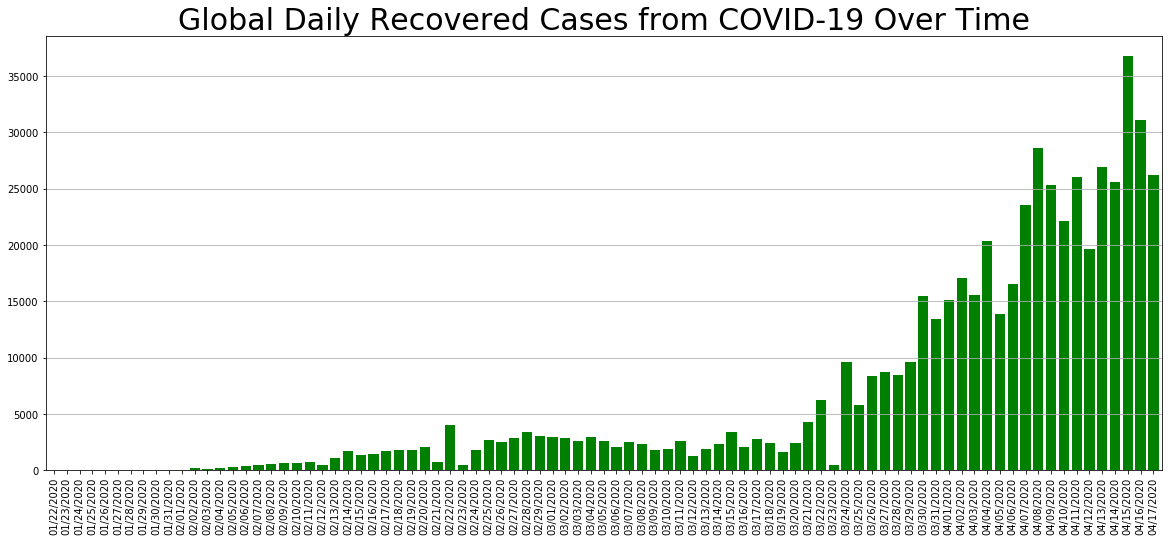

In [21]:
daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green').grid(axis='y')
plt.title('Global Daily Recovered Cases from COVID-19 Over Time', size=30);

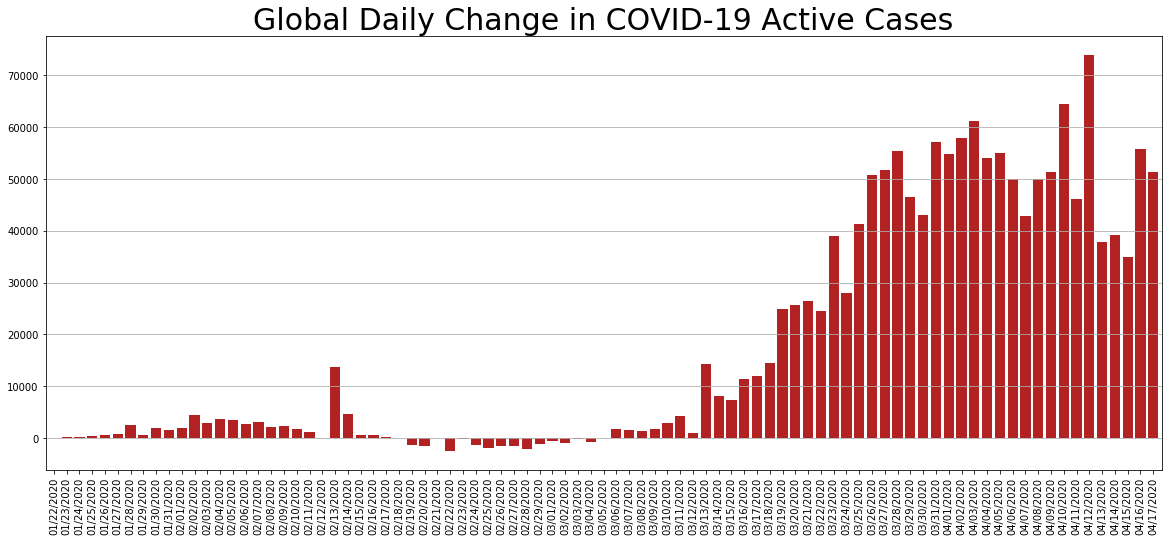

In [22]:
daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick').grid(axis='y')
plt.title('Global Daily Change in COVID-19 Active Cases', size=30);

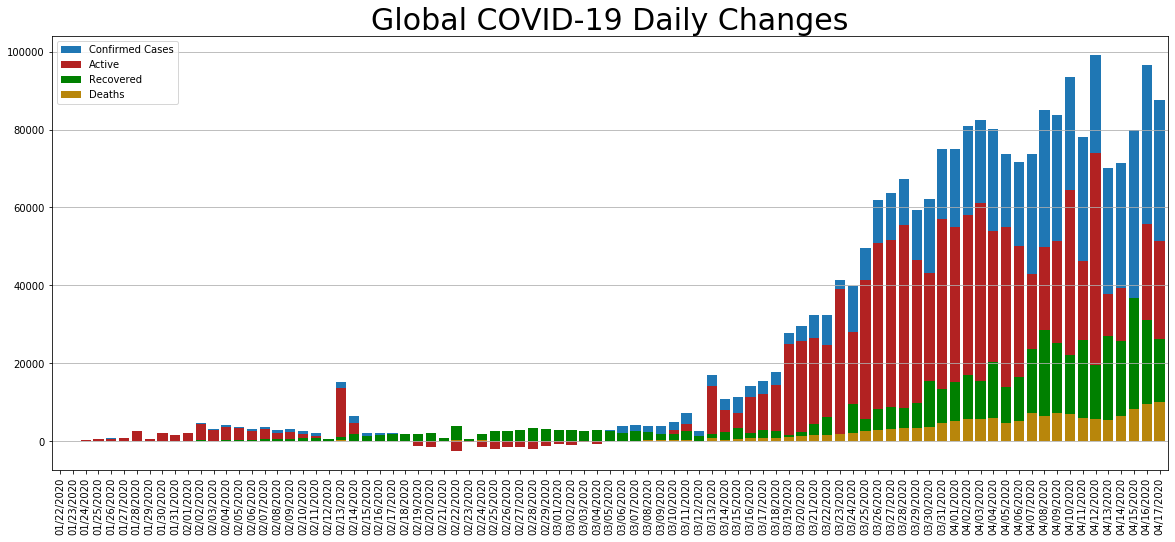

In [23]:
daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, label='Confirmed Cases', legend=True).grid(axis='y')
daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick', label='Active', legend=True).grid(axis='y')
daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green', label='Recovered', legend=True).grid(axis='y')
daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod', label='Deaths', legend=True).grid(axis='y')
plt.title('Global COVID-19 Daily Changes', size=30);

In [24]:
def get_data(country):
    cases = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
    daily_increase = pd.Series(cases).diff().tolist()
    deaths = [deaths_df[deaths_df['Country/Region']==country][i].sum() for i in dates]
    daily_death = pd.Series(deaths).diff().tolist()
    recoveries  = [recoveries_df[recoveries_df['Country/Region']==country][i].sum() for i in dates]
    daily_recovery = pd.Series(recoveries).diff().tolist()
    return (cases, deaths, recoveries, daily_increase, daily_death, daily_recovery)

def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1, linewidth=4)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3, color='darkgoldenrod')
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4, color='green')
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=10)
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.grid(axis='y')
    plt.show()

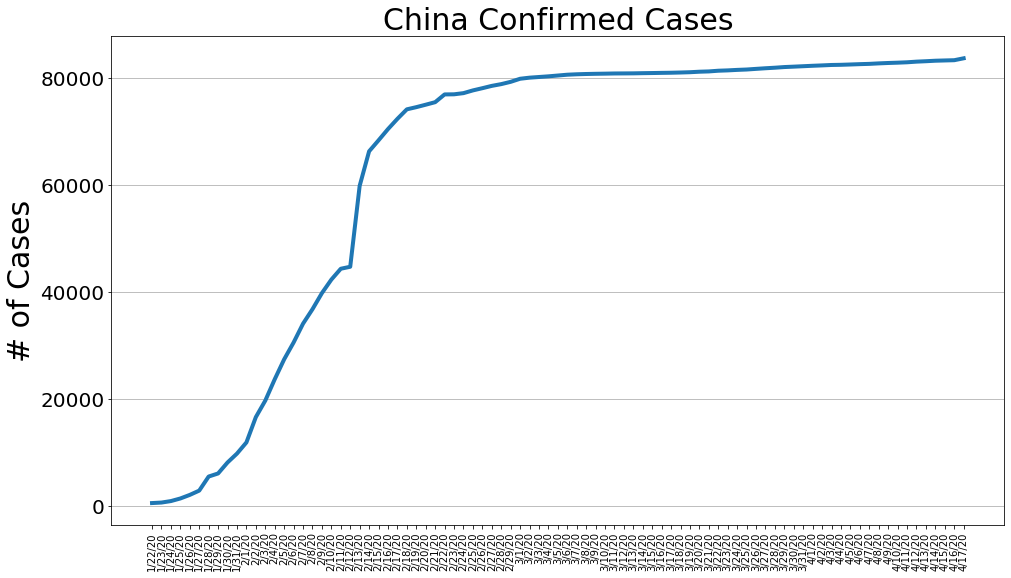

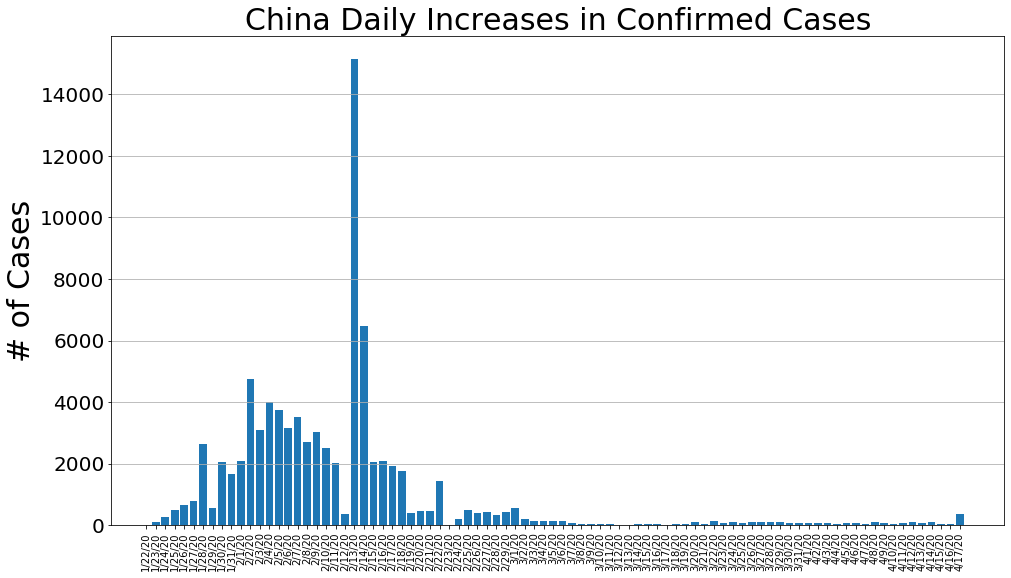

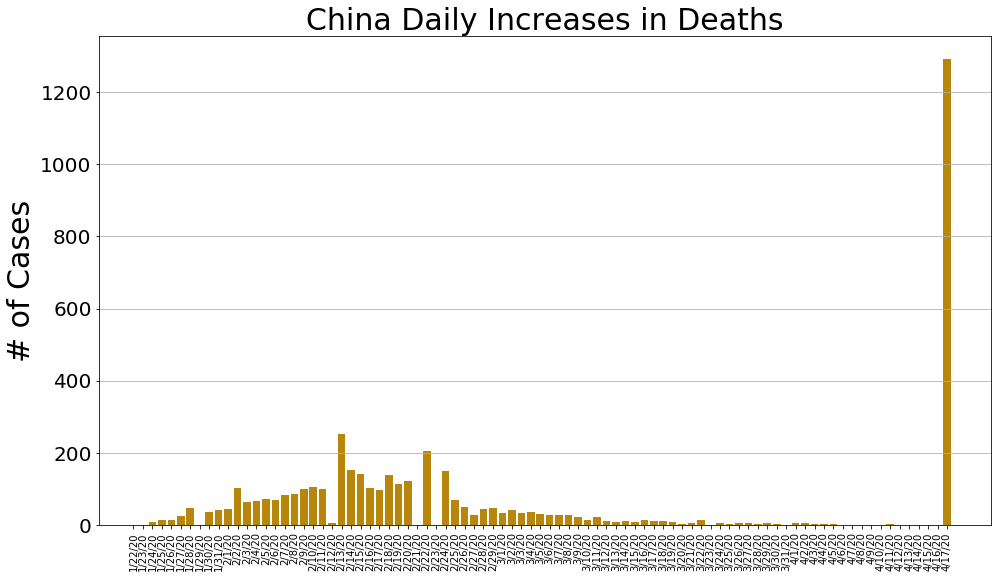

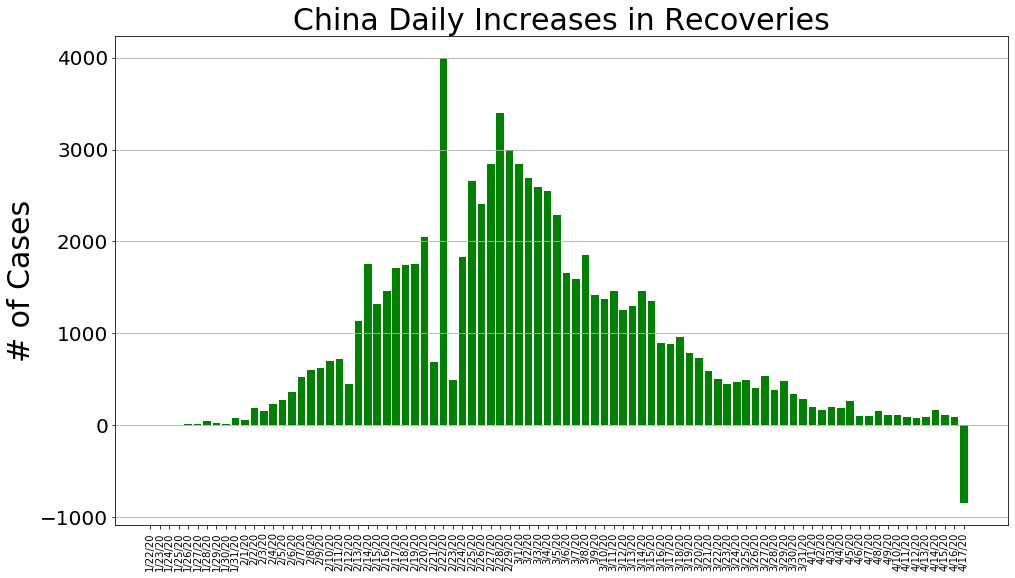

In [25]:
country = 'China'
china_cases, china_deaths, china_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, china_cases, daily_increase, daily_death, daily_recovery, country)

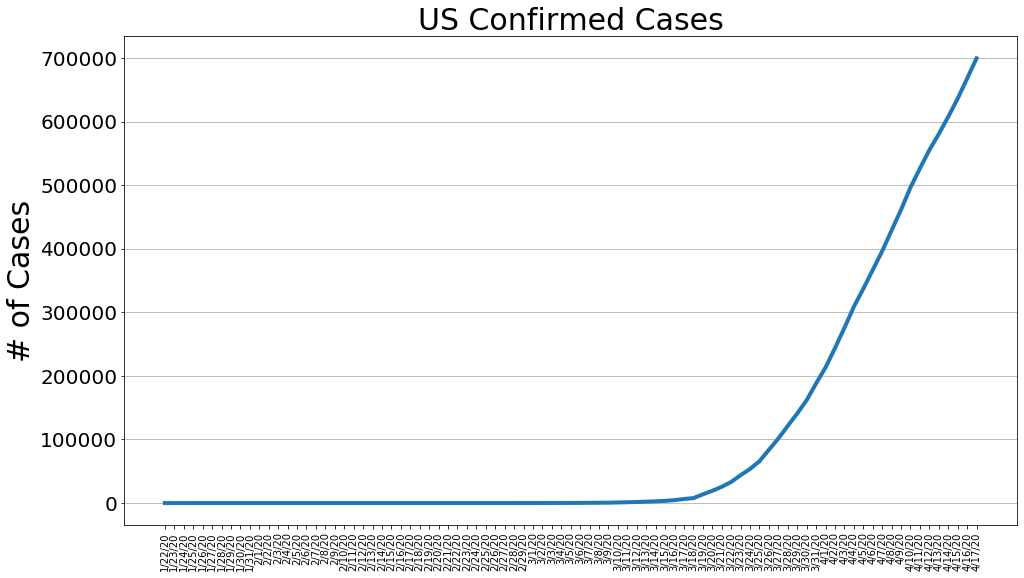

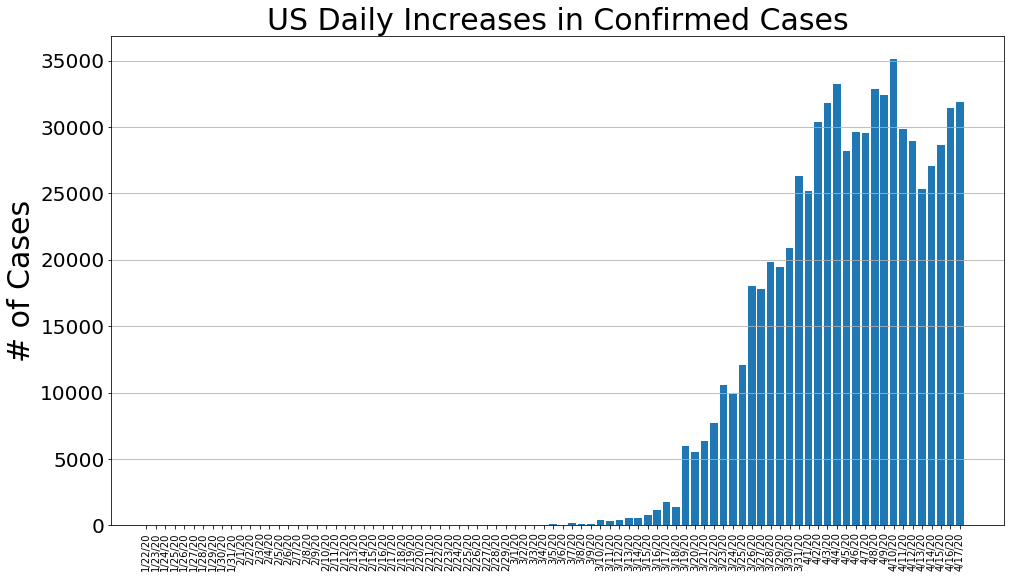

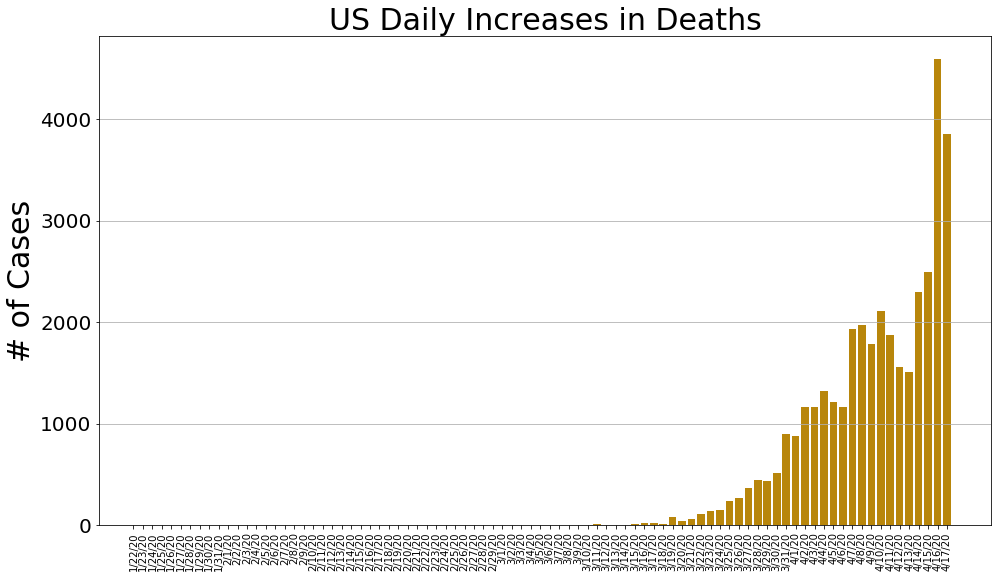

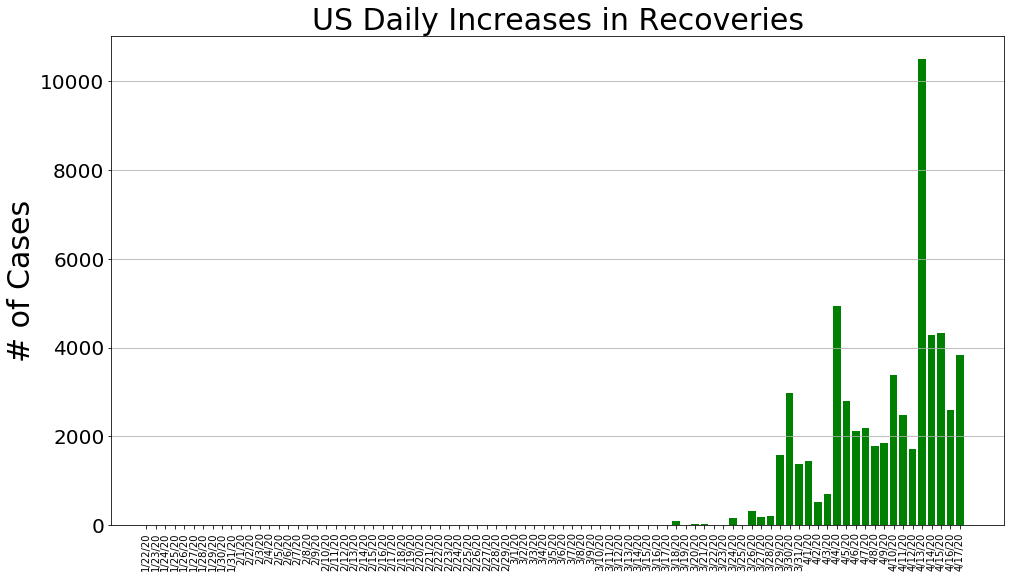

In [26]:
country = 'US'
us_cases, us_deaths, us_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, us_cases, daily_increase, daily_death, daily_recovery, country)

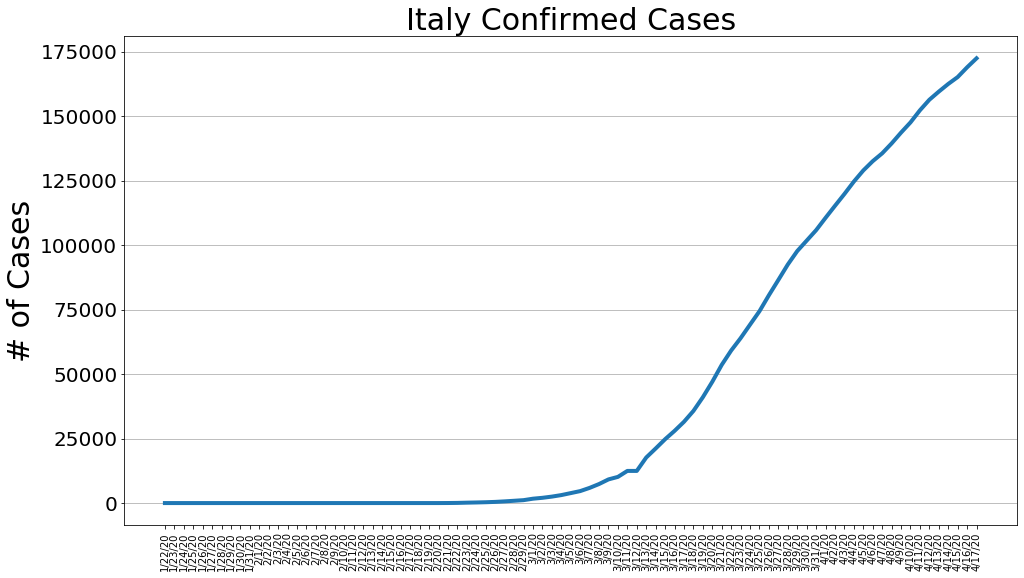

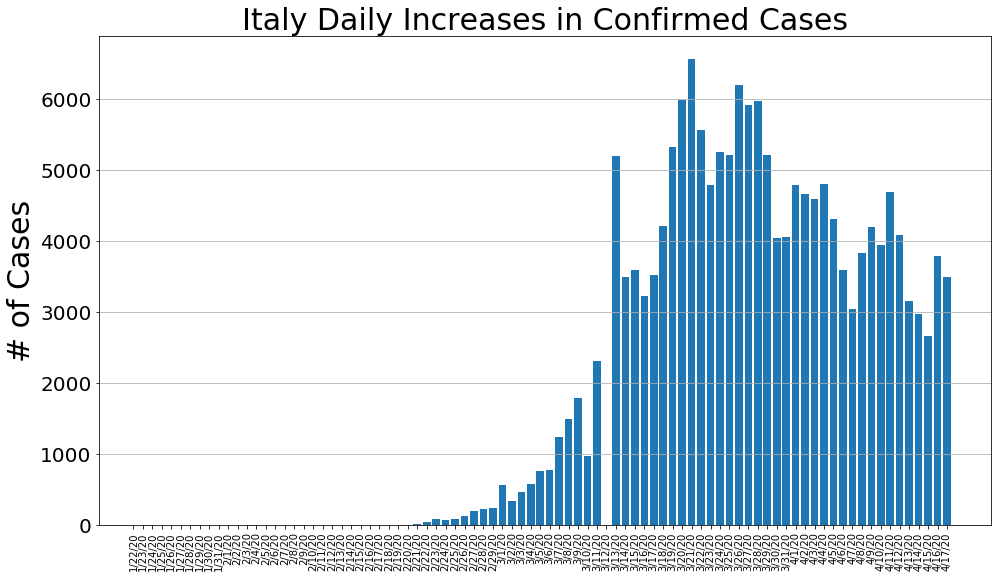

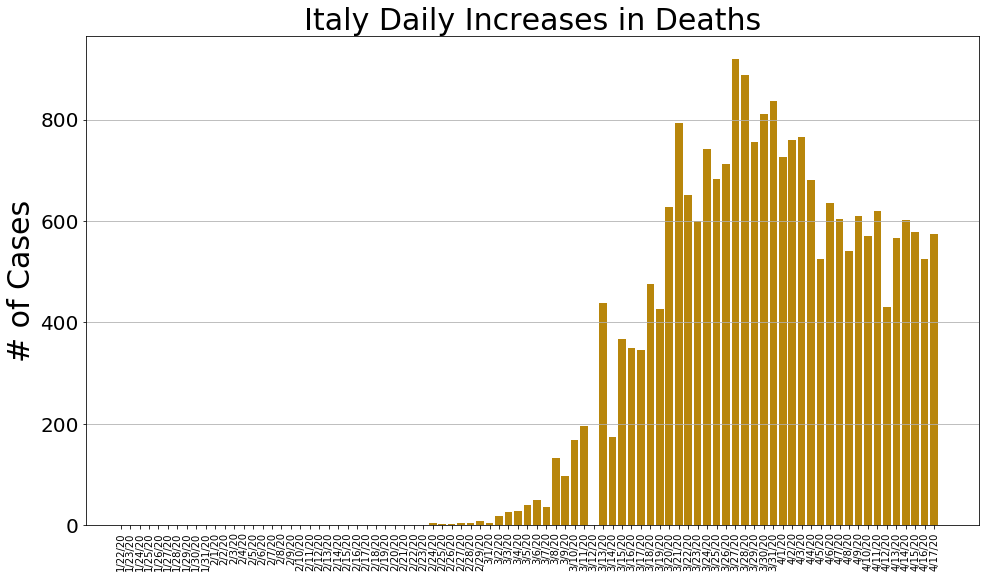

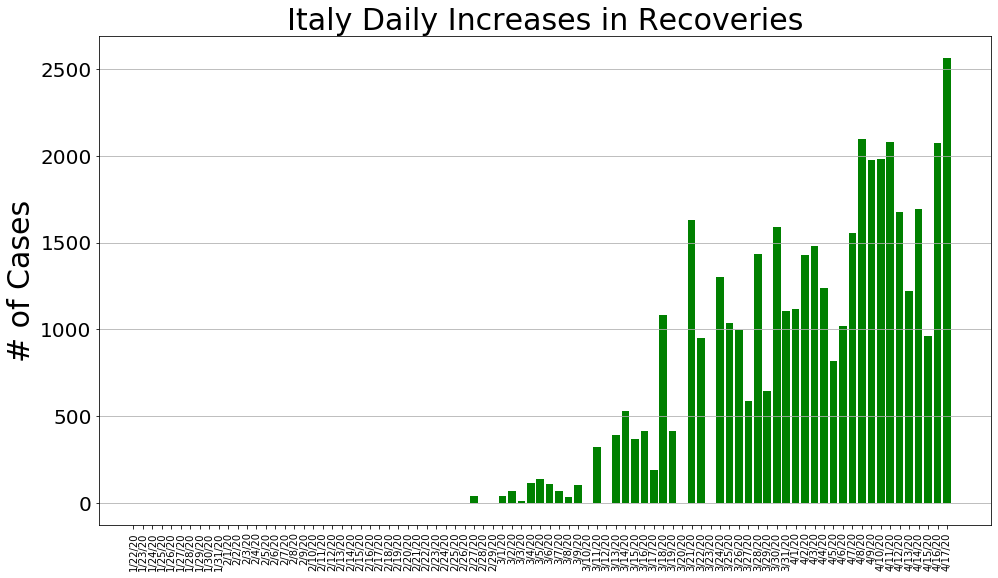

In [27]:
country = 'Italy'
italy_cases, italy_deaths, italy_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, italy_cases, daily_increase, daily_death, daily_recovery, country)

In [28]:
country = 'Spain'
spain_cases, spain_deaths, spain_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, spain_cases, daily_increase, daily_death, daily_recovery, country)

In [29]:
country = 'France'
france_cases, france_deaths, france_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, france_cases, daily_increase, daily_death, daily_recovery, country)

In [30]:
country = 'Germany'
germany_cases, germany_deaths, germany_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
# country_plot(dates, germany_cases, daily_increase, daily_death, daily_recovery, country)

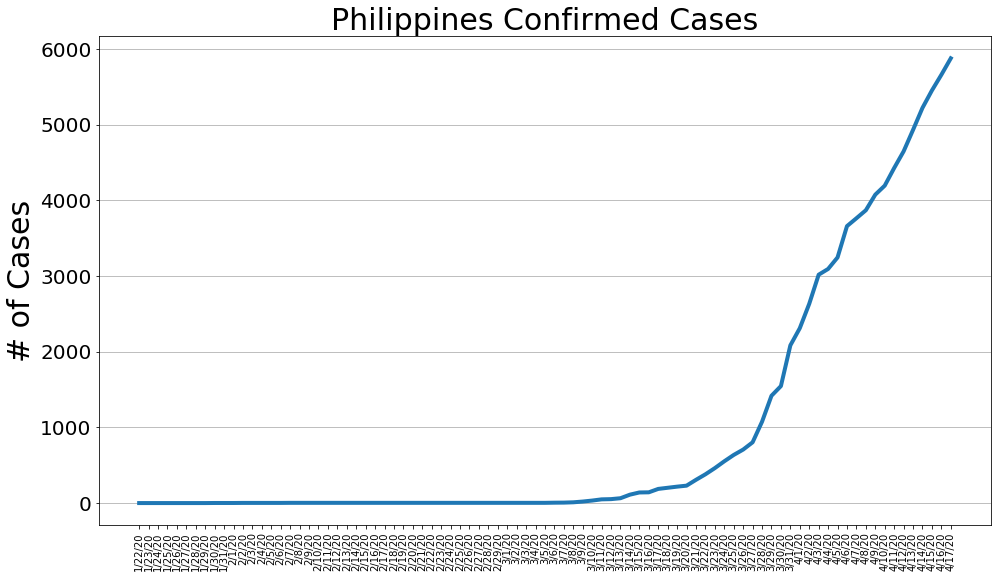

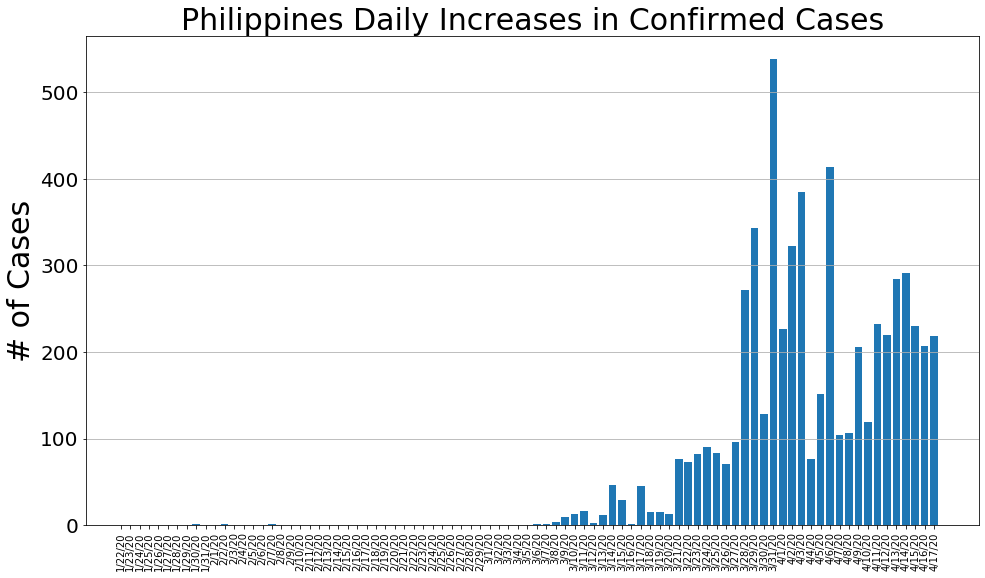

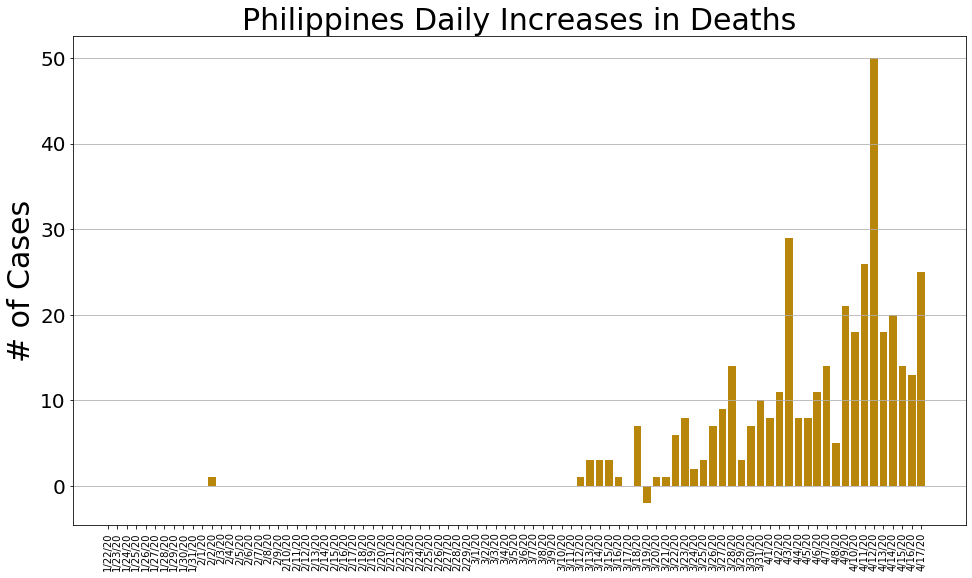

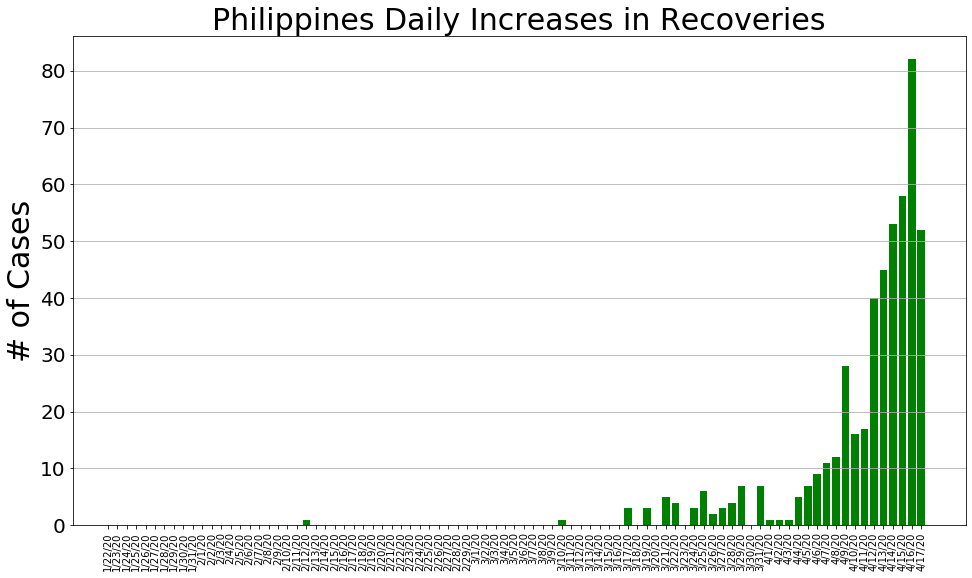

In [31]:
country = 'Philippines'
philippine_cases, philippine_deaths, philippine_recoveries, daily_increase, daily_death,daily_recovery = get_data(country)
country_plot(dates, philippine_cases, daily_increase, daily_death, daily_recovery, country)

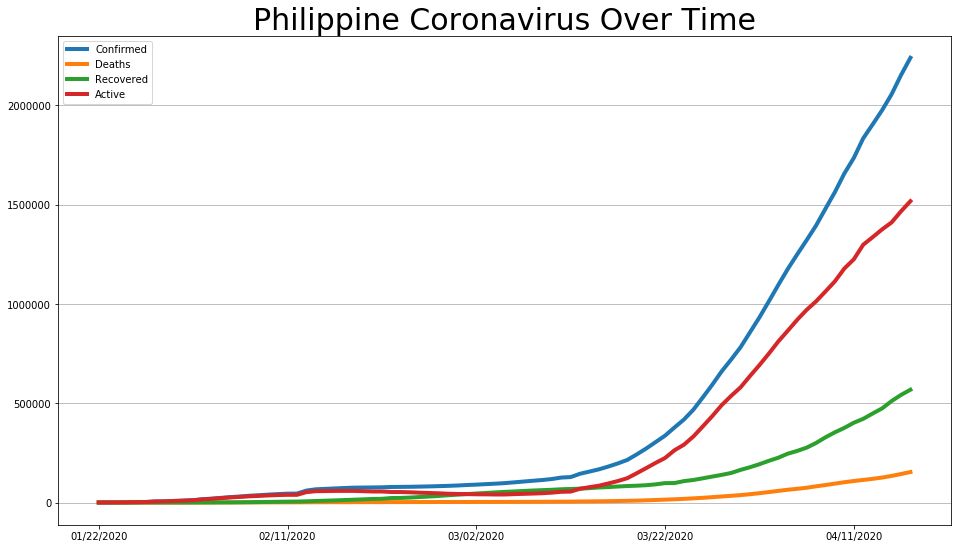

In [32]:
# philippine_cases, philippine_deaths, philippine_recoveries, daily_increase, daily_death,daily_recovery
philippine_total_active = (np.array(philippine_cases)-np.array(philippine_deaths)-np.array(philippine_recoveries)).tolist()
philippine_covid_df = pd.DataFrame(
    {'Confirmed': philippine_cases,
     'Deaths'   : philippine_deaths,
     'Recovered': philippine_recoveries,
     'Active'   : philippine_total_active
    }, index=dates_dt)
covid_df.plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Philippine Coronavirus Over Time', size=30);

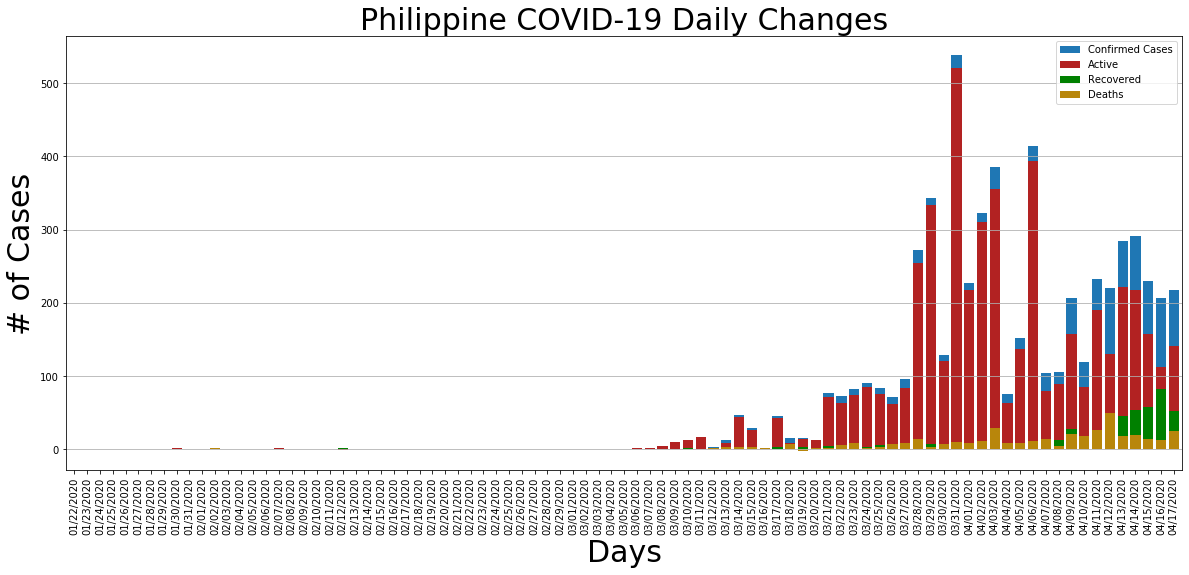

In [33]:
ph_daily_change = philippine_covid_df.diff()
ph_daily_change.Confirmed.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, label='Confirmed Cases', legend=True).grid(axis='y')
ph_daily_change.Active.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='firebrick', label='Active', legend=True).grid(axis='y')
ph_daily_change.Recovered.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='green', label='Recovered', legend=True).grid(axis='y')
ph_daily_change.Deaths.plot.bar(figsize=(20, 8), linewidth=4, width=0.8, color='darkgoldenrod', label='Deaths', legend=True).grid(axis='y')
plt.title('Philippine COVID-19 Daily Changes', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30);

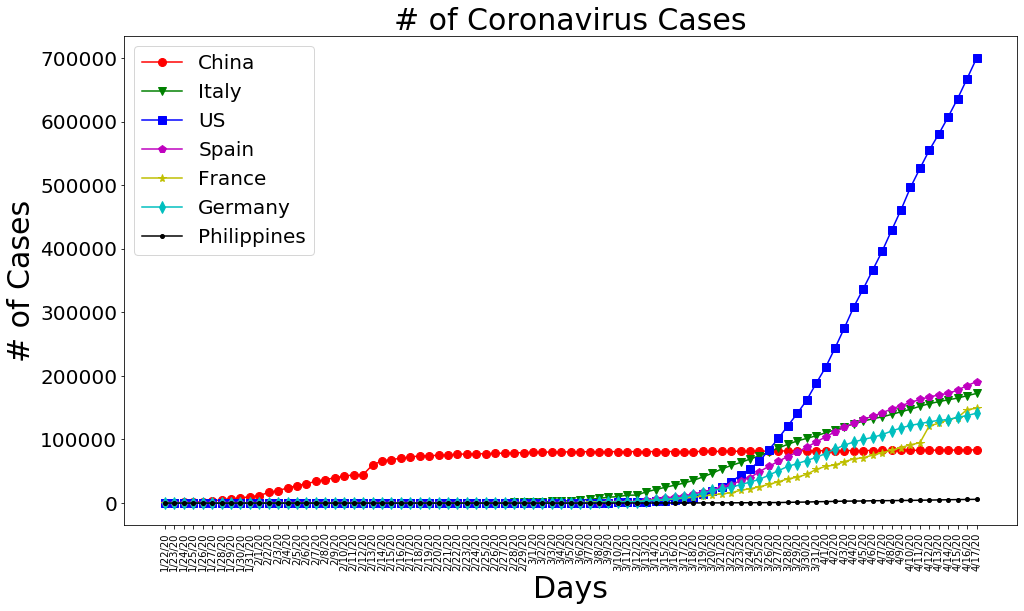

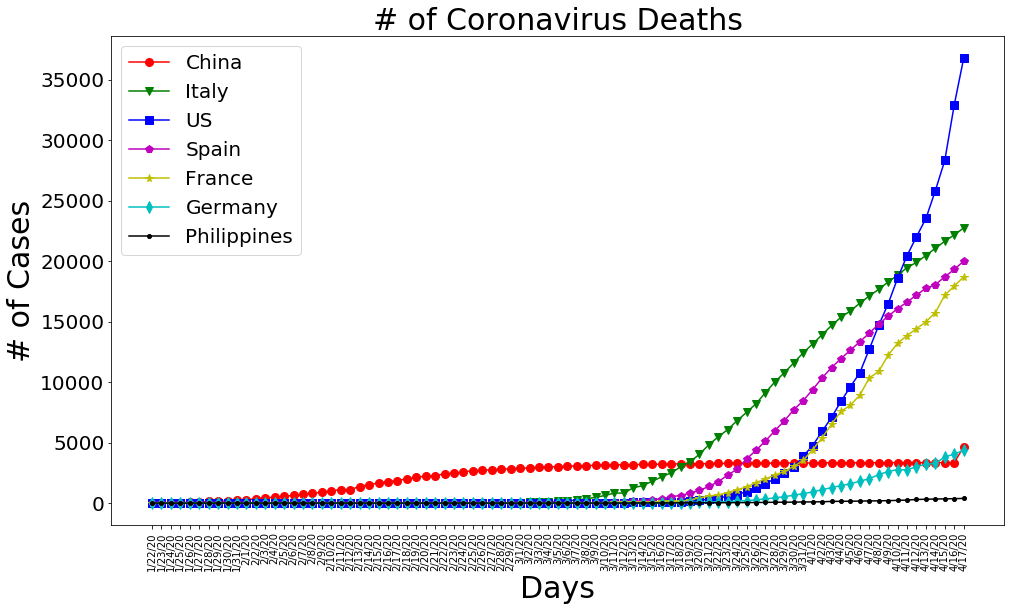

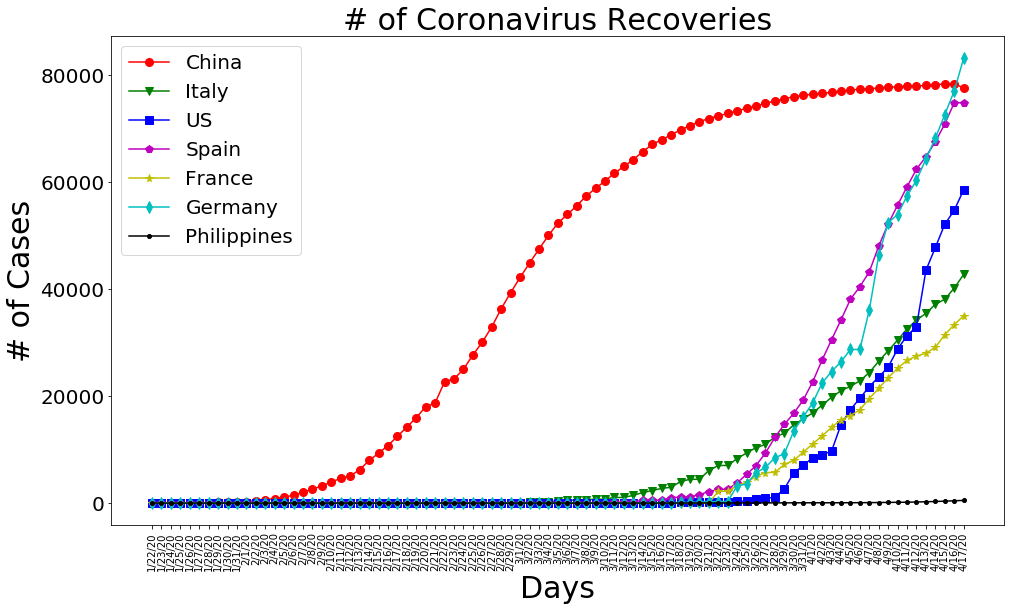

In [34]:
plt.figure(figsize=(16, 9))
plt.plot(dates, china_cases, 'ro-', markersize=8)
plt.plot(dates, italy_cases, 'gv-', markersize=8)
plt.plot(dates, us_cases, 'bs-', markersize=8)
plt.plot(dates, spain_cases, 'mp-', markersize=8)
plt.plot(dates, france_cases, 'y*-', markersize=8)
plt.plot(dates, germany_cases, 'cd-', markersize=8)
plt.plot(dates, philippine_cases, 'k.-', markersize=8)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(dates, china_deaths, 'ro-', markersize=8)
plt.plot(dates, italy_deaths, 'gv-', markersize=8)
plt.plot(dates, us_deaths, 'bs-', markersize=8)
plt.plot(dates, spain_deaths, 'mp-', markersize=8)
plt.plot(dates, france_deaths, 'y*-', markersize=8)
plt.plot(dates, germany_deaths, 'cd-', markersize=8)
plt.plot(dates, philippine_deaths, 'k.-', markersize=8)
plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(dates, china_recoveries, 'ro-', markersize=8)
plt.plot(dates, italy_recoveries, 'gv-', markersize=8)
plt.plot(dates, us_recoveries, 'bs-', markersize=8)
plt.plot(dates, spain_recoveries, 'mp-', markersize=8)
plt.plot(dates, france_recoveries, 'y*-', markersize=8)
plt.plot(dates, germany_recoveries, 'cd-', markersize=8)
plt.plot(dates, philippine_recoveries, 'k.-', markersize=8)
plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany','Philippines'], prop={'size': 20})
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

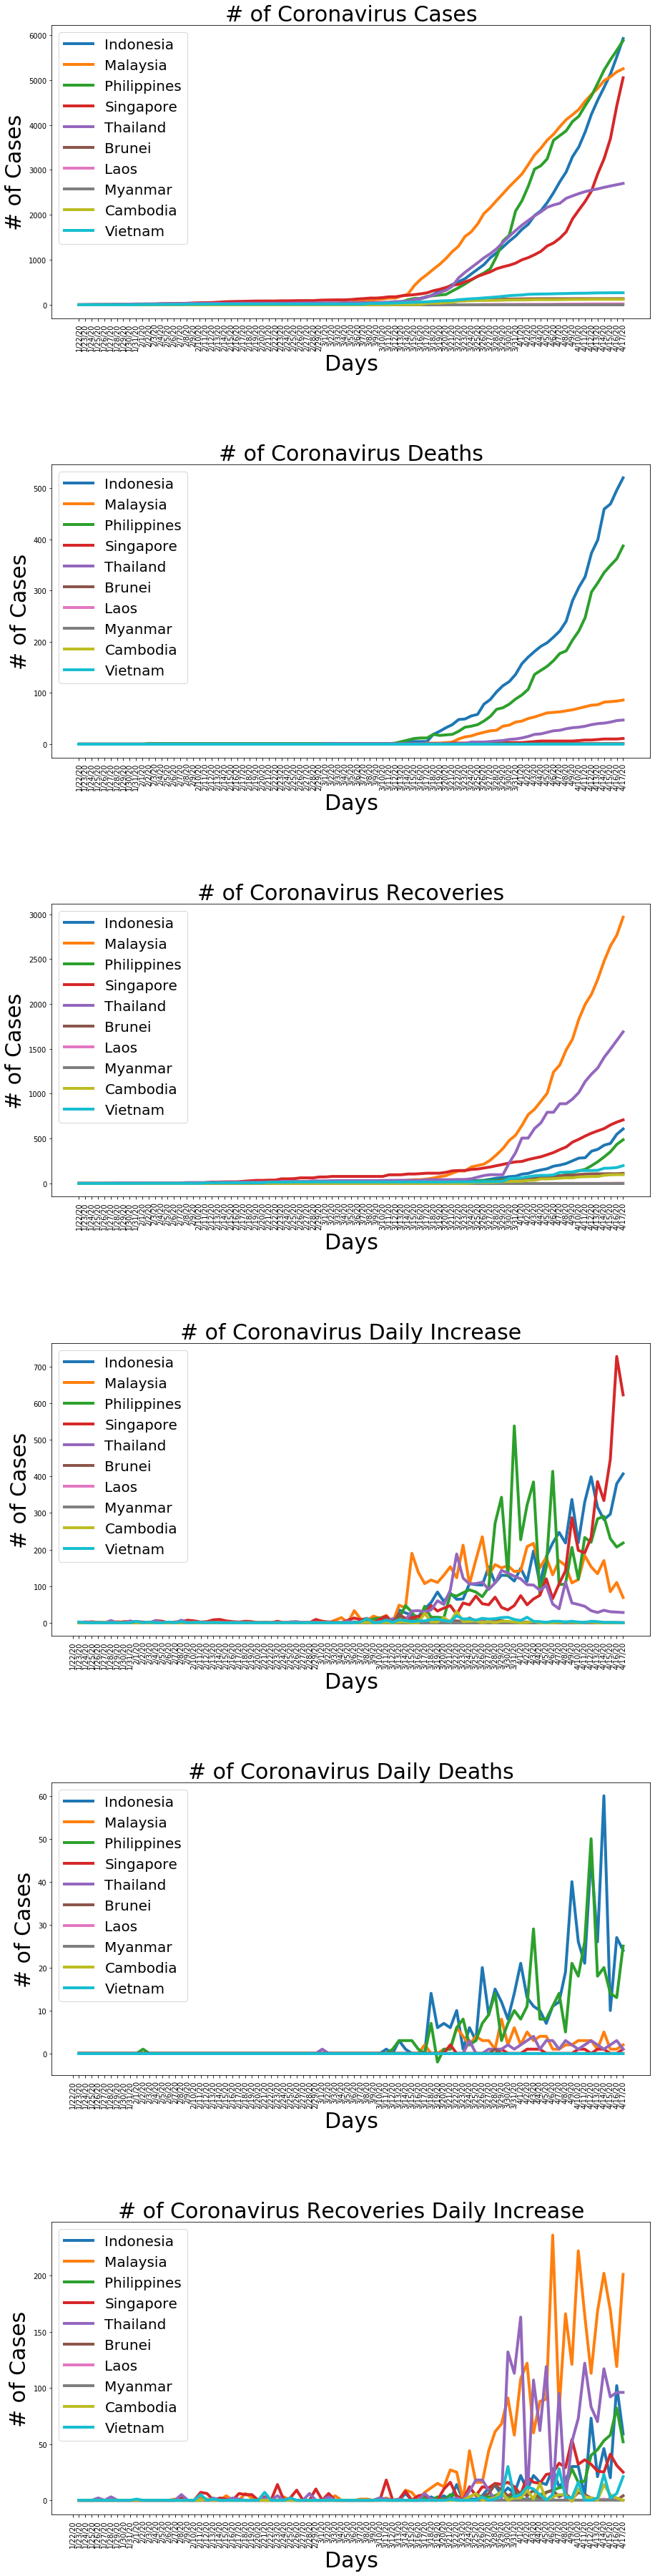

In [35]:
fig, axs = plt.subplots(6,1, figsize=(15, 64), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5)
axs = axs.ravel()

ASEAN = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Brunei', 'Laos', 'Myanmar', 'Cambodia', 'Vietnam']
 
for country in ASEAN:    
    cases, deaths, recoveries, daily_increase, daily_death, daily_recovery = get_data(country)
    
    axs[0].plot(dates, cases, markersize=8, linewidth=4)
    axs[0].set_title('# of Coronavirus Cases', size=30)
    axs[0].set_xlabel('Days', size=30)
    axs[0].set_ylabel('# of Cases', size=30)
    axs[0].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[0].set_xticklabels(dates, rotation=90)

    
    axs[1].plot(dates, deaths, markersize=8, linewidth=4)
    axs[1].set_title('# of Coronavirus Deaths', size=30)
    axs[1].set_xlabel('Days', size=30)
    axs[1].set_ylabel('# of Cases', size=30)
    axs[1].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[1].set_xticklabels(dates, rotation=90)


    axs[2].plot(dates, recoveries, markersize=8, linewidth=4)
    axs[2].set_title('# of Coronavirus Recoveries', size=30)
    axs[2].set_xlabel('Days', size=30)
    axs[2].set_ylabel('# of Cases', size=30)
    axs[2].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[2].set_xticklabels(dates, rotation=90)

    
    axs[3].plot(dates, daily_increase, markersize=8, linewidth=4)
    axs[3].set_title('# of Coronavirus Daily Increase', size=30)
    axs[3].set_xlabel('Days', size=30)
    axs[3].set_ylabel('# of Cases', size=30)
    axs[3].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[3].set_xticklabels(dates, rotation=90)


    axs[4].plot(dates, daily_death, markersize=8, linewidth=4)
    axs[4].set_title('# of Coronavirus Daily Deaths', size=30)
    axs[4].set_xlabel('Days', size=30)
    axs[4].set_ylabel('# of Cases', size=30)
    axs[4].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[4].set_xticklabels(dates, rotation=90)

    
    axs[5].plot(dates, daily_recovery, markersize=8, linewidth=4)
    axs[5].set_title('# of Coronavirus Recoveries Daily Increase', size=30)
    axs[5].set_xlabel('Days', size=30)
    axs[5].set_ylabel('# of Cases', size=30)
    axs[5].legend(ASEAN, prop={'size': 20}, loc="upper left")
    axs[5].set_xticklabels(dates, rotation=90)


## Mortality

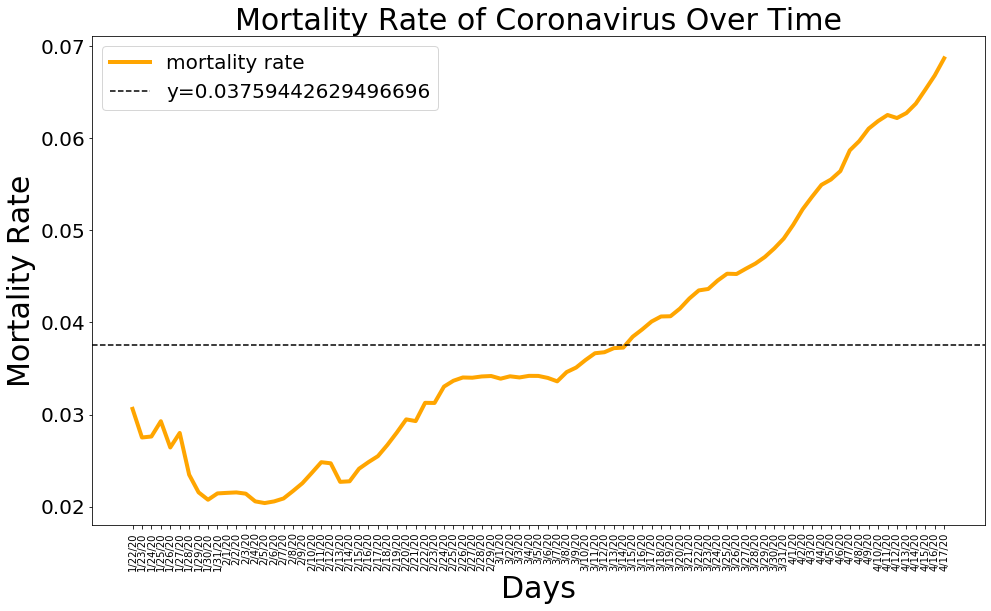

In [36]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, mortality_rate, color='orange', linewidth=4)
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

## Recovery Rate

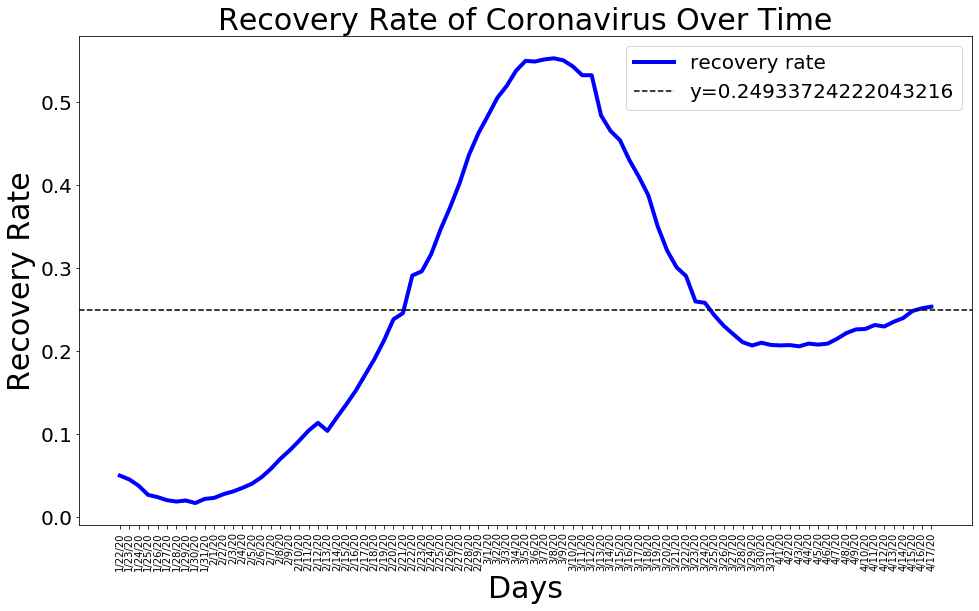

In [37]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, recovery_rate, color='blue', linewidth=4)
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

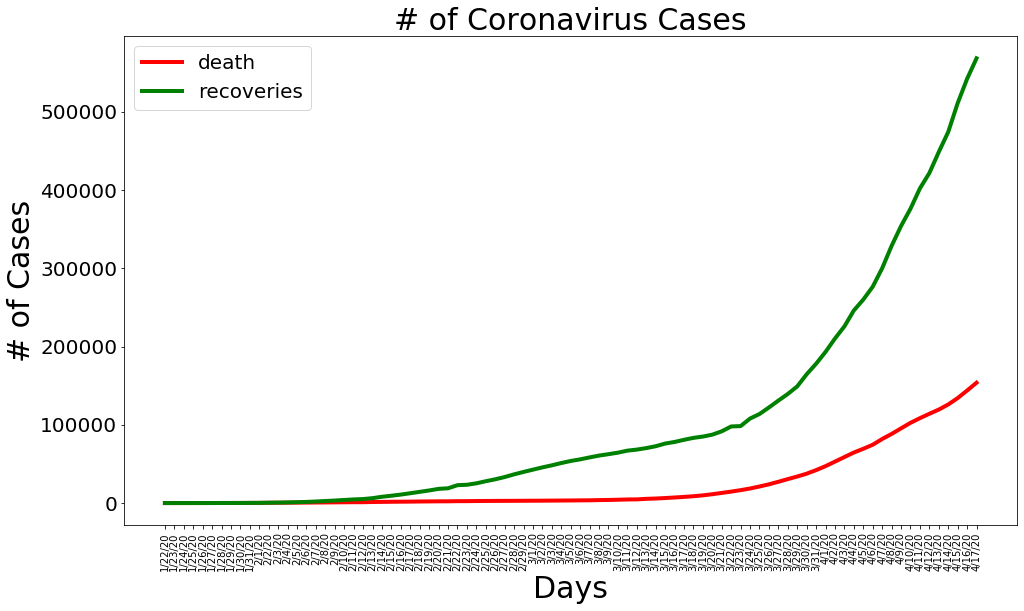

In [38]:
plt.figure(figsize=(16, 9))
plt.plot(dates, total_deaths, color='red', linewidth=4)
plt.plot(dates, total_recovered, color='green', linewidth=4)
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.show()

## COVID-19 By Country

In [39]:
import operator

unique_countries =  list(latest_data['Country_Region'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [40]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,667801,32916,54703,580182,0.049290
1,Spain,184948,19315,74797,90836,0.104435
2,Italy,168941,22170,40164,106607,0.131229
3,France,147091,17941,33327,95823,0.121972
4,Germany,137698,4052,77000,56646,0.029427
5,United Kingdom,104145,13759,375,90011,0.132114
6,China,83403,3346,78401,1656,0.040118
7,Iran,77995,4869,52229,20897,0.062427
8,Turkey,74193,1643,7089,65461,0.022145
9,Belgium,34809,4857,7562,22390,0.139533


## COVID-19 By Provinces/State/City

In [41]:
unique_provinces =  list(latest_data['Province_State'].unique())

province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [42]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,223691,14832,0,0.066306
1,New Jersey,US,75317,3518,0,0.046709
2,Hubei,China,67803,3222,64435,0.047520
3,Massachusetts,US,32181,1108,0,0.034430
4,Michigan,US,28809,1996,0,0.069284
5,Pennsylvania,US,28258,841,0,0.029761
6,California,US,27677,956,0,0.034541
7,Illinois,US,25734,1072,0,0.041657
8,Florida,US,23343,668,0,0.028617
9,Louisiana,US,22532,1156,0,0.051305


In [43]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

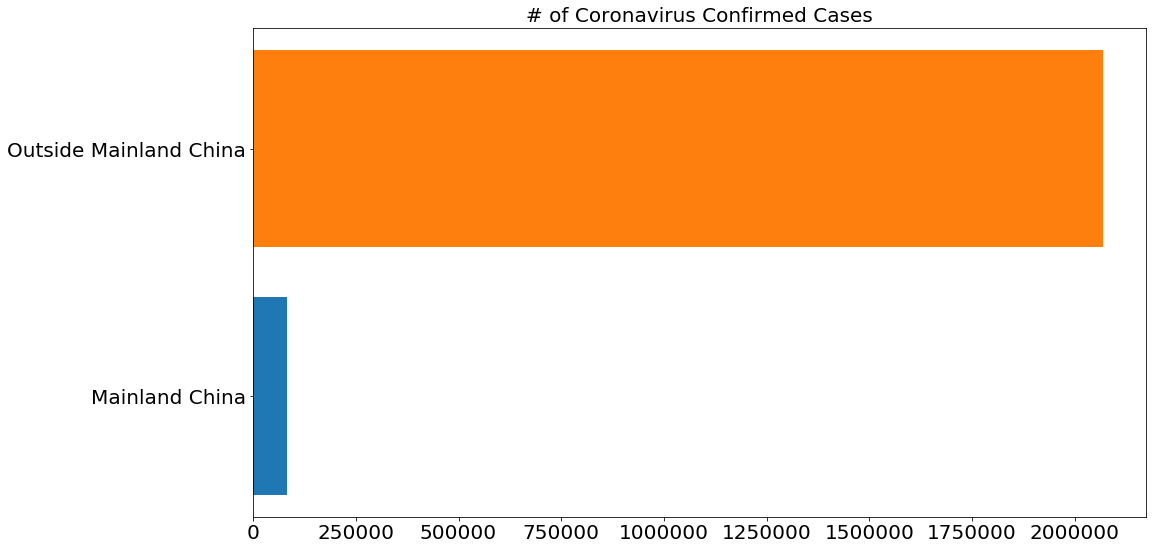

In [44]:
china_confirmed = latest_data[latest_data['Country_Region']=='China']['Confirmed'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [45]:
print('Outside Mainland China: {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China: 2069244 cases
Mainland China: 83403 cases
Total: 2152647 cases


In [46]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [47]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

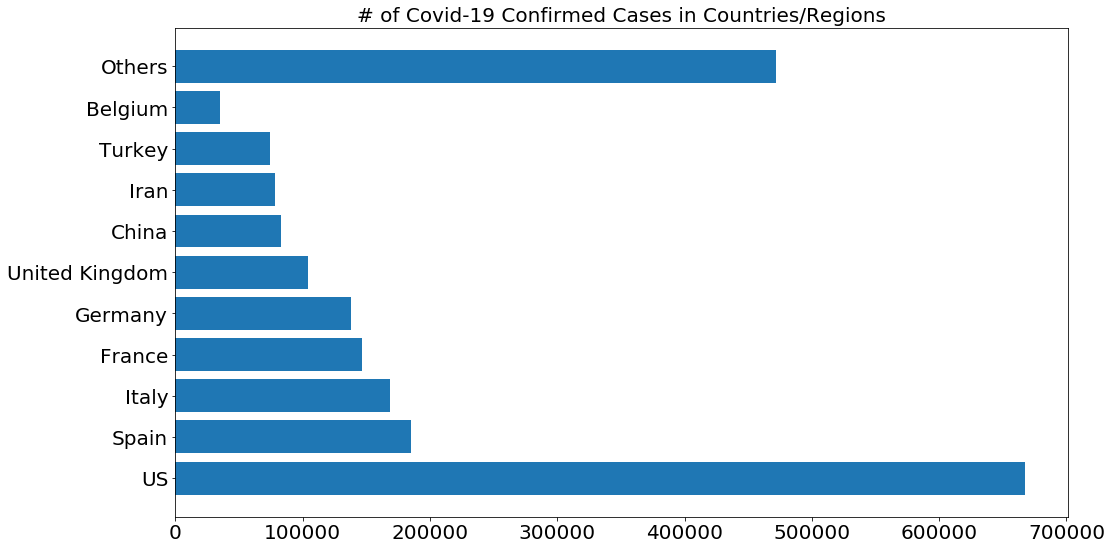

In [48]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

In [49]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

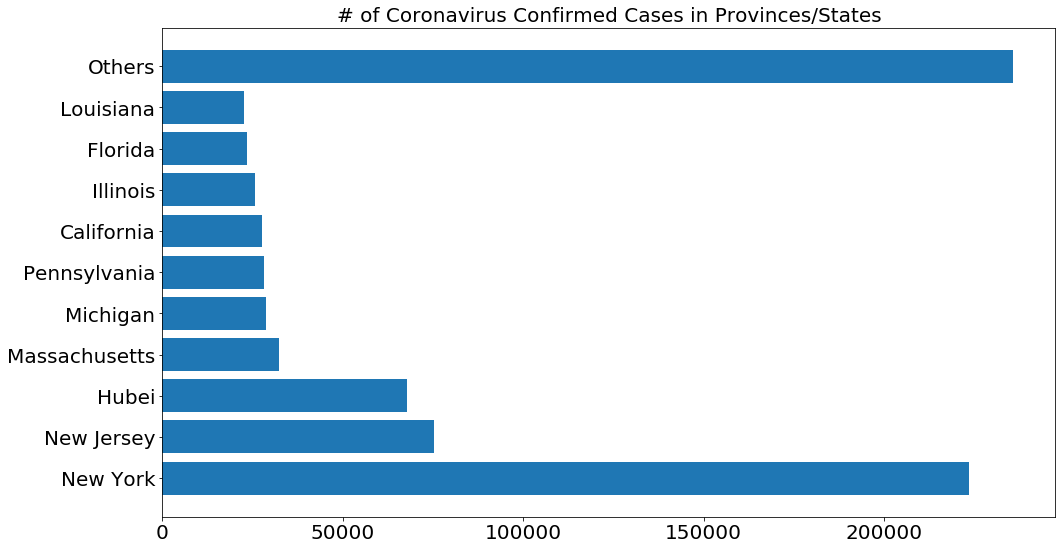

In [50]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, '# of Coronavirus Confirmed Cases in Provinces/States')

In [51]:
import matplotlib.colors as mcolors


def plot_pie_charts(x, y, title): 
    random.seed(23)
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

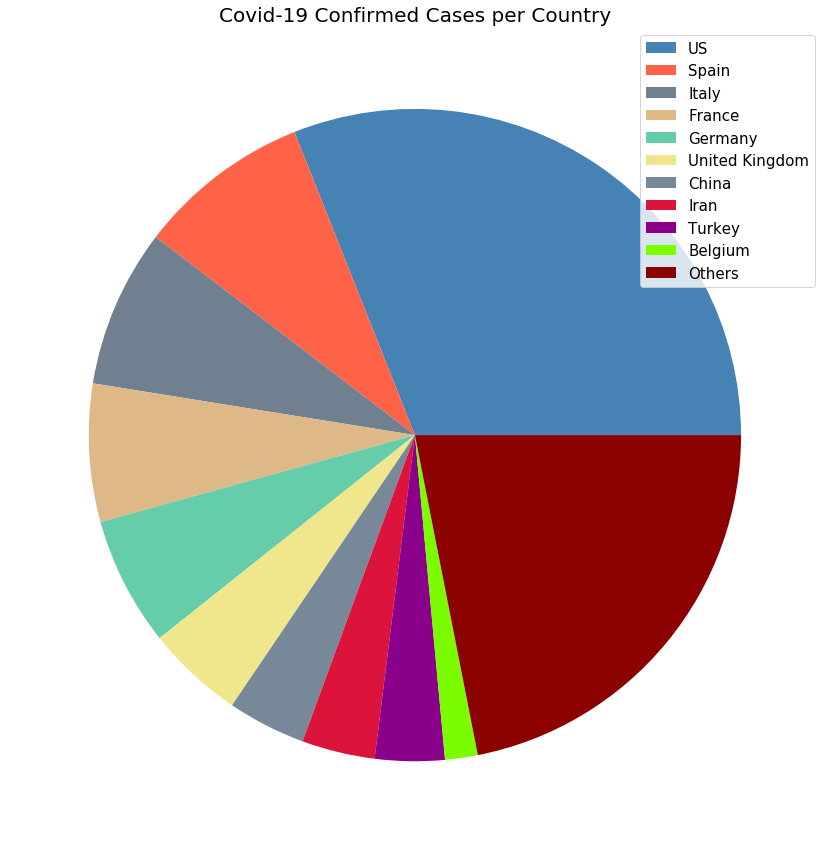

In [52]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

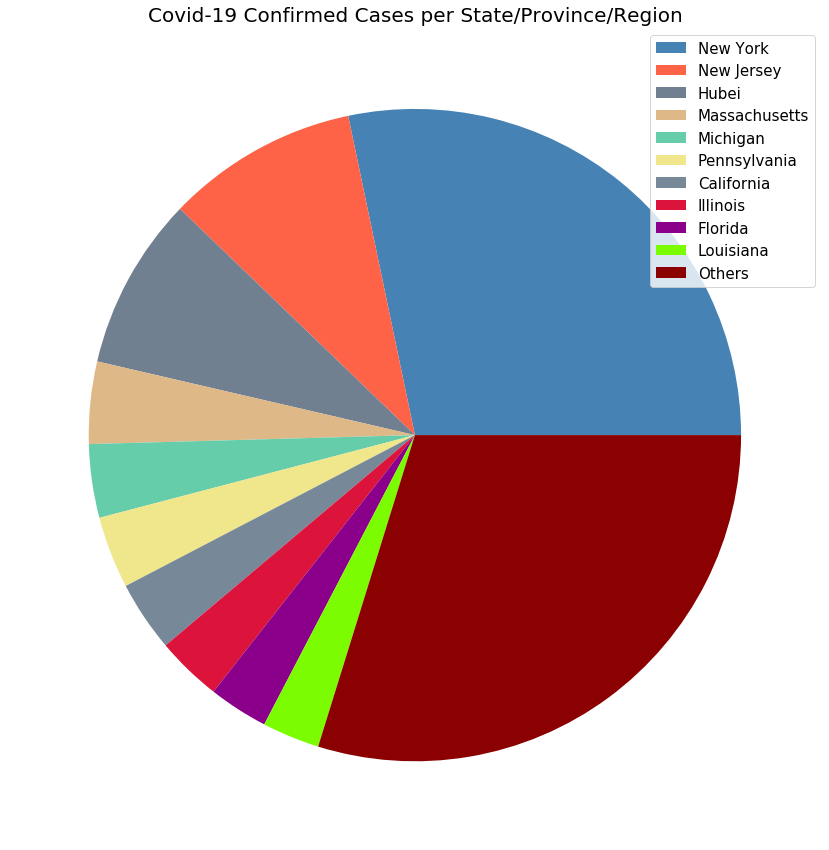

In [53]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [54]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

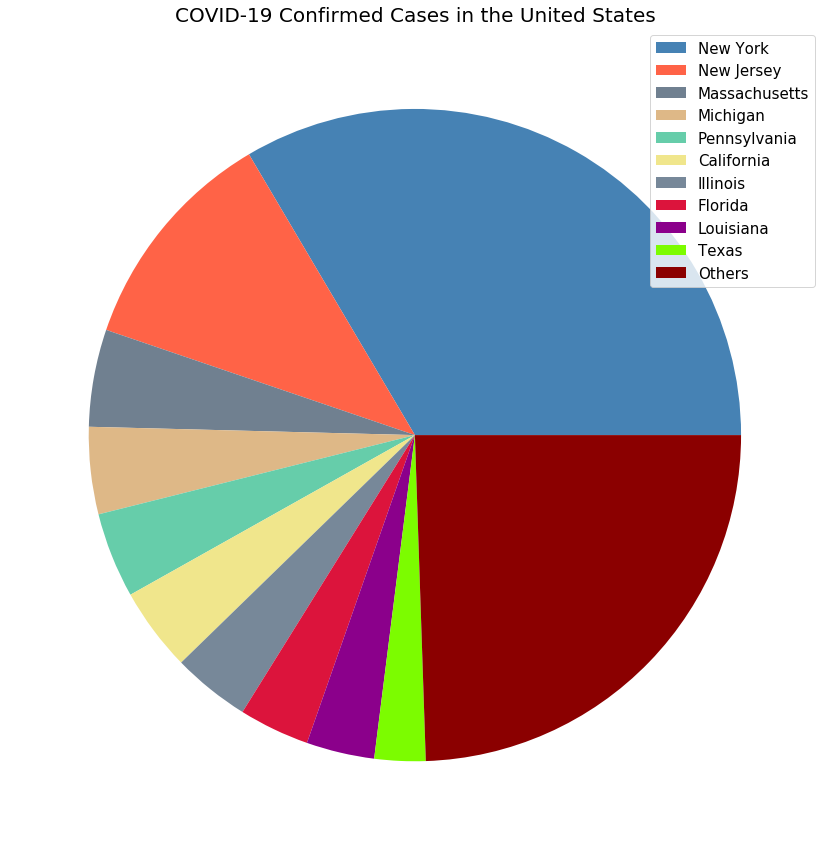

In [55]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

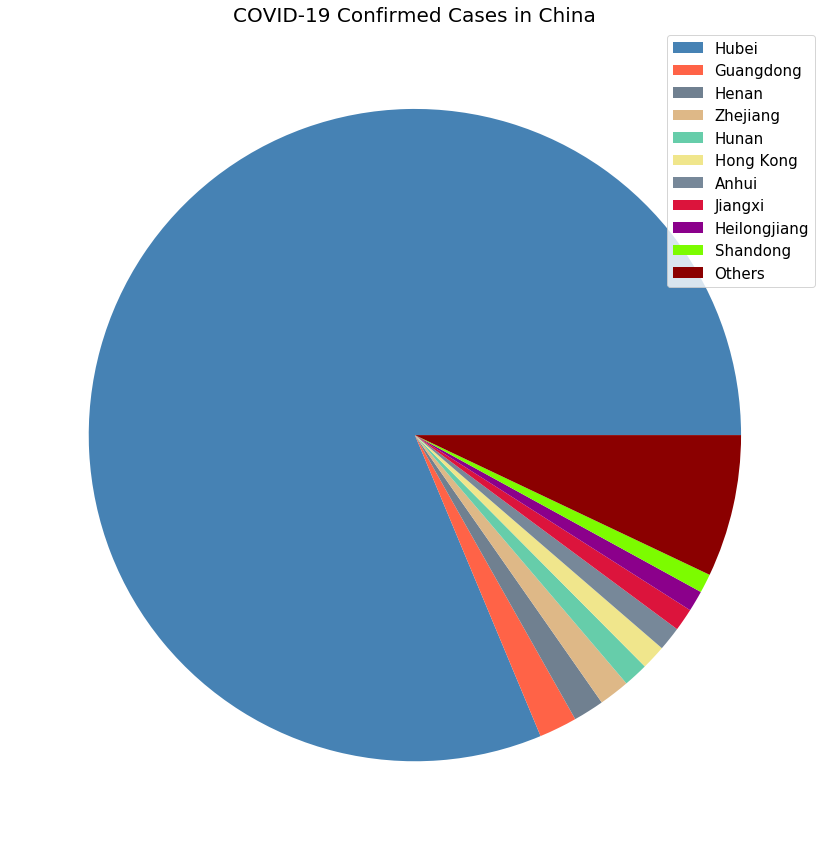

In [56]:
plot_pie_country_with_regions('China', 'COVID-19 Confirmed Cases in China')